<a href="https://colab.research.google.com/github/Ru1chi/Feynn_Labs/blob/main/pandas_and_matplotlib_in_python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lond vs wide data


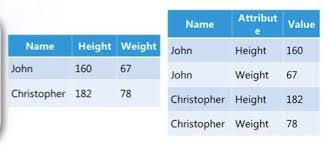

In [ ]:
#wide format: where we have a single row for every data point with multiple columns to hold the values of various attributes
#long format:where each data point we have as many as rows as the number of attributes and each row contains the values of a particular attribute for a given data point
melt function=convert wide data to long data
pivot=convert long data to wide data


In [1]:
import pandas as pd
import numpy as np
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [ ]:
w=pd.DataFrame({'cse':[120],'ec':[100],'mech':[55]})
w

,cse,ec,mech
0,120,100,55


In [ ]:
w.melt(var_name='branch',value_name='no of students')

,branch,no of students
0,cse,120
1,ec,100
2,mech,55


In [ ]:
w1=pd.DataFrame({
    'branch':['cse','ec','mech'],
    '2020':[100,150,60],
    '2021':[120,100,55],
    '2022':[150,140,70]
})

w1.melt()#this is the wrong answer as we do not needed to melt the brach so applying melting selecting the column name

w1.melt(id_vars=['branch'],var_name='year',value_name='no of students')


,branch,year,no of students
0,cse,2020,100
1,ec,2020,150
2,mech,2020,60
3,cse,2021,120
4,ec,2021,100
5,mech,2021,55
6,cse,2022,150
7,ec,2022,140
8,mech,2022,70


In [ ]:
#use of pivot=convert long to wide
death=pd.read_csv("/content/time_series_covid19_deaths_global.csv")
confirm=pd.read_csv("/content/time_series_covid19_confirmed_global.csv")

In [ ]:
death=death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='no of deaths')#THIS IS WIDE DATA


In [ ]:
confirm=confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='no of cases')#THIS IS WIDE DATA


In [ ]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long'])[['Country/Region','date','no of cases','no ']]

### Pivot table_

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
expense=pd.read_csv("/content/expense_data.csv")
titanic=pd.read_csv("/content/titanic.csv")

In [ ]:
df=sns.load_dataset('tips')#toy dataset available in the seaborn library
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#pivot table is used on the categorical data
df.groupby('sex')[['total_bill']].mean()#the [[]] usages means we are making the dataframe

<ipython-input-4-37ba5bdec0fb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()#the [[]] usages means we are making the dataframe


,total_bill
sex,
Male,20.744076
Female,18.056897


In [ ]:
df.groupby(['sex','smoker'])[['total_bill']].mean()#this forms the multiindex dataframe


<ipython-input-5-6d844588bc85>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean()#this forms the multiindex dataframe


total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [ ]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

<ipython-input-6-19160ad1a132>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [ ]:
#the alternative of above code is the use of pivot table
df.pivot_table(index='sex',columns='smoker',values='total_bill')#which one is index,which one is columns,on what value we want to do analysis

<ipython-input-7-a91fc9eb99eb>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')#which one is index,which one is columns,on what value we want to do analysis


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [ ]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')#also provide the aggregate function

<ipython-input-8-9453396287c7>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')#also provide the aggregate function


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [ ]:
#if we do not provide the value then the columns are found for aal the
df.pivot_table(index='sex',columns='smoker',aggfunc='count')['tip']#later take out desired column

<ipython-input-14-cdf1461f47d5>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',aggfunc='count')['tip']


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

<ipython-input-22-d350dfc1c2fd>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [ ]:
#margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)#it gives the sum of the values applying aggfunc

<ipython-input-24-71ebd1ba7e4e>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [ ]:
#plotting graph
expense['Category'].value_counts()

,count
Category,
Food,156
Other,60
Transportation,31
Apparel,7
Household,6
Allowance,6
Social Life,5
Education,1
Salary,1


In [ ]:
expense.info()#date is string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [ ]:
expense['Date']=pd.to_datetime(expense['Date'])

In [ ]:
expense['month']=expense['Date'].dt.month_name()

In [ ]:
expense['time']=expense['Date'].dt.time

In [ ]:
expense

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month,time
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March,10:11:00
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March,10:11:00
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March,19:50:00
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March,18:56:00
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March,18:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0,November,14:16:00
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0,November,14:16:00
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0,November,17:07:00
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0,November,15:50:00


In [ ]:
expense.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0)#gives the sum of expenditure in each month

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='month'>

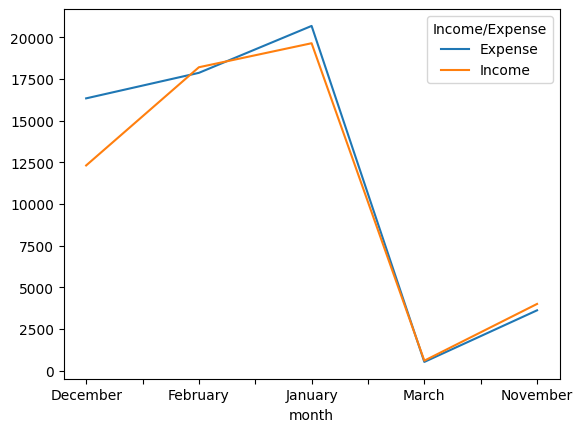

In [ ]:
expense.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()


<Axes: xlabel='month'>

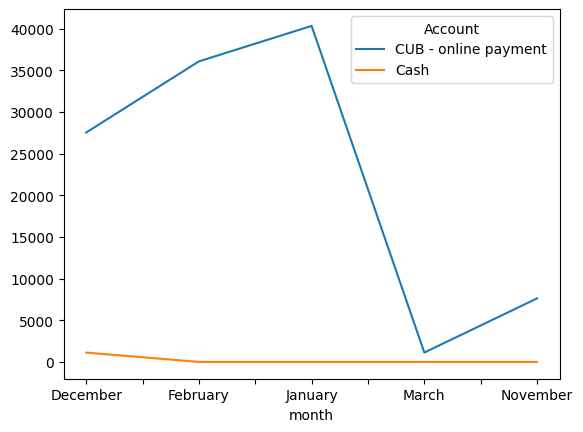

In [ ]:
expense.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()

### Vectorized string operations

In [ ]:
#used on the textual data

In [ ]:
#what are vectorized operation=done on vctors
a=np.array([1,2,3,4,5])
a*4#this is an example of vwctorized operation
#array is vector

array([ 4,  8, 12, 16, 20])

In [ ]:
#problem in vectorized operations in vanilla python=cannot be done using normal python
s=['cat','mat',None,'rat']

In [ ]:
[i.startswith('c') for i in s]#since there is none the function is not applied

AttributeError: 'NoneType' object has no attribute 'startswith'

In [ ]:
#how pandas solve this problem
s=pd.Series(['cat','mat',None,'rat'])
#s.str=string.accessor=add on which we need to always put when we want to apply operation on series or dataframe
s.str.startswith('c')


,0
0,True
1,False
2,None
3,False


In [ ]:
titanic['Name'].str.lower()

,Name
0,"braund, mr. owen harris"
1,"cumings, mrs. john bradley (florence briggs th..."
2,"heikkinen, miss. laina"
3,"futrelle, mrs. jacques heath (lily may peel)"
4,"allen, mr. william henry"
...,...
886,"montvila, rev. juozas"
887,"graham, miss. margaret edith"
888,"johnston, miss. catherine helen ""carrie"""
889,"behr, mr. karl howell"


In [ ]:
titanic['Name'].str.capitalize()#first letter capital

,Name
0,"Braund, mr. owen harris"
1,"Cumings, mrs. john bradley (florence briggs th..."
2,"Heikkinen, miss. laina"
3,"Futrelle, mrs. jacques heath (lily may peel)"
4,"Allen, mr. william henry"
...,...
886,"Montvila, rev. juozas"
887,"Graham, miss. margaret edith"
888,"Johnston, miss. catherine helen ""carrie"""
889,"Behr, mr. karl howell"


In [ ]:
titanic['Name'].str.upper()

,Name
0,"BRAUND, MR. OWEN HARRIS"
1,"CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH..."
2,"HEIKKINEN, MISS. LAINA"
3,"FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)"
4,"ALLEN, MR. WILLIAM HENRY"
...,...
886,"MONTVILA, REV. JUOZAS"
887,"GRAHAM, MISS. MARGARET EDITH"
888,"JOHNSTON, MISS. CATHERINE HELEN ""CARRIE"""
889,"BEHR, MR. KARL HOWELL"


In [ ]:
titanic['Name'].str.len().min()#name with least characters

12

In [ ]:
titanic['Name'][titanic['Name'].str.len()==82]

,Name
307,"Penasco y Castellana, Mrs. Victor de Satode (M..."


In [ ]:
titanic['Name'].str.len().max()

82

In [ ]:
titanic['Name'].str.strip()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
titanic['lastname']=titanic['Name'].str.split(',').str.get(0) #splitting name when there is comma,str.get()helps to get that value from all the datapoints

In [ ]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings


In [ ]:
titanic[['title','firstname']]=titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)#the expand parameter will make the 2 series formed into single dataframe
#but the problem arises is that the person having 2 pr more word name is also splitted therefore we will split only on first space using n=1

In [ ]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)


In [ ]:
#replace
titanic['title']=titanic['title'].str.replace('Ms.','Miss.')
titanic['title']=titanic['title'].str.replace('Mlle.','Miss.')

In [ ]:
titanic['title'].value_counts()

,count
title,
Mr.,517
Miss.,185
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Major.,2
Col.,2
Don.,1


In [ ]:
#filtering
#passenger details whose name startswith a
titanic[titanic['firstname'].str.startswith('A')]#endswith,isalpha,isdigit,

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr.,Anders Johan
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss.,"Anna ""Annie"""
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,Holverson,Mr.,Alexander Oskar
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,Vander Planke,Miss.,Augusta Maria
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,Miss.,Amelie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,Serepeca,Miss.,Augusta
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing,Mr.,Anthony
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Duran y More,Miss.,Asuncion
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss.,"Adele Kiamie ""Jane"""


In [ ]:
#applying regex
titanic[titanic['firstname'].str.contains('john',case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Turpin,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Barton,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Turpin,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Cribb,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Bengtsson,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Goldsmith,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D


In [ ]:
#find a surname that startswith and endswith vowel
titanic[titanic['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


In [ ]:
#slicing
titanic['Name'].str[::2]

,Name
0,"Ban,M.Oe ars"
1,Cmns r.Jh rde Foec rgsTae)
2,Hiknn is an
3,"Ftel,Ms aqe et Ll a el"
4,Aln r ila er
...,...
886,"Mnvl,Rv uzs"
887,"Gaa,Ms.Mrae dt"
888,"Jhso,Ms.CteieHln""are"
889,"Bh,M.Kr oel"


### Timestamp objects
### vectorized date_time operation

In [ ]:
#creating a timestamp
import pandas as pd

In [ ]:
pd.Timestamp('2025/1/1')#assumes that time is 12 at mid night


Timestamp('2025-01-01 00:00:00')

In [ ]:
pd.Timestamp('2025')#timestamp object

Timestamp('2025-01-01 00:00:00')

In [ ]:
pd.Timestamp('1st january 2025')

Timestamp('2025-01-01 00:00:00')

In [ ]:
#comma specify
pd.Timestamp('5th January 2025 9:21PM ')

Timestamp('2025-01-05 21:21:00')

In [ ]:
#pythons date time object
#using datetime.datetime object
import datetime as dt
dt.datetime(2025,1,1,21,56)#datetime object

datetime.datetime(2025, 1, 1, 21, 56)

In [ ]:
x=pd.Timestamp(dt.datetime(2025,1,1,21,56))#benefits of making the timestamp object-fetch desired time or date or year

In [ ]:
x.year

2025

In [ ]:
x.month

1

In [ ]:
x.day

1

In [ ]:
x.hour

21

In [ ]:
x.minute

56

In [ ]:
x.second

0

In [ ]:
#why seperate objects to handle sata and time when python has already has datetime functionality
syntax wise is convenient
for huge data python is slow
memory problem=created
to store single date time we use dattime stamp
to store multiple dattime er use datetimeindex

### datetime index object

In [ ]:
import pandas as pd
pd.DatetimeIndex(['2024/1/1','2023/1/1','2022/1/1'])

DatetimeIndex(['2024-01-01', '2023-01-01', '2022-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
#another method
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2024,1,1)])

DatetimeIndex(['2023-01-01', '2024-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
dt_index=pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2024,1,1),pd.Timestamp(2025,1,1)])

In [ ]:
pd.Series([1,2,3],index=dt_index)

,0
2023-01-01,1
2024-01-01,2
2025-01-01,3


### date_range function

In [ ]:
pd.date_range(start='2024/1/1',end='2024/2/22',freq='2D')#prints alternative dates

DatetimeIndex(['2024-01-01', '2024-01-03', '2024-01-05', '2024-01-07',
               '2024-01-09', '2024-01-11', '2024-01-13', '2024-01-15',
               '2024-01-17', '2024-01-19', '2024-01-21', '2024-01-23',
               '2024-01-25', '2024-01-27', '2024-01-29', '2024-01-31',
               '2024-02-02', '2024-02-04', '2024-02-06', '2024-02-08',
               '2024-02-10', '2024-02-12', '2024-02-14', '2024-02-16',
               '2024-02-18', '2024-02-20', '2024-02-22'],
              dtype='datetime64[ns]', freq='2D')

In [ ]:
pd.date_range(start='2024/1/1',end='2024/2/22',freq='B')#buisness dayes-mon to fir

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-22',
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-05', '2024-02-06', '2024-02-07',
               '2024-02-08', '2024-02-09', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-19',
               '2024-02-20', '2024-02-21', '2024-02-22'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
pd.date_range(start='2024/1/1',end='2024/2/22',freq='W')#one day of each week

DatetimeIndex(['2024-01-07', '2024-01-14', '2024-01-21', '2024-01-28',
               '2024-02-04', '2024-02-11', '2024-02-18'],
              dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
pd.date_range(start='2024/1/1',end='2024/2/22',freq='W-THU')#show week days but of our choice in each-thursday

DatetimeIndex(['2024-01-04', '2024-01-11', '2024-01-18', '2024-01-25',
               '2024-02-01', '2024-02-08', '2024-02-15', '2024-02-22'],
              dtype='datetime64[ns]', freq='W-THU')

In [ ]:
pd.date_range(start='2024/1/1',end='2024/2/22',freq='6H')#generates timestamp for each hour in this date range-6H means timestamp at 6 o clock

<ipython-input-18-0c08922d113d>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2024/1/1',end='2024/2/22',freq='6H')#generates timestamp for each hour in this date range


DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 06:00:00',
               '2024-01-01 12:00:00', '2024-01-01 18:00:00',
               '2024-01-02 00:00:00', '2024-01-02 06:00:00',
               '2024-01-02 12:00:00', '2024-01-02 18:00:00',
               '2024-01-03 00:00:00', '2024-01-03 06:00:00',
               ...
               '2024-02-19 18:00:00', '2024-02-20 00:00:00',
               '2024-02-20 06:00:00', '2024-02-20 12:00:00',
               '2024-02-20 18:00:00', '2024-02-21 00:00:00',
               '2024-02-21 06:00:00', '2024-02-21 12:00:00',
               '2024-02-21 18:00:00', '2024-02-22 00:00:00'],
              dtype='datetime64[ns]', length=209, freq='6h')

In [ ]:
pd.date_range(start='2024/1/1',end='2024/2/22',freq='M')#ending date of a months

<ipython-input-19-07767cb2c286>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2024/1/1',end='2024/2/22',freq='M')


DatetimeIndex(['2024-01-31'], dtype='datetime64[ns]', freq='ME')

In [ ]:
pd.date_range(start='2024/1/1',end='2024/2/22',freq='MS')#starting dates of a month

DatetimeIndex(['2024-01-01', '2024-02-01'], dtype='datetime64[ns]', freq='MS')

In [ ]:
pd.date_range(start='2024/1/1',periods=25,freq='M')#dont know ending but kow the period

<ipython-input-23-087897622e94>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2024/1/1',periods=25,freq='M')#dont know ending but kow the period


DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31',
               '2026-01-31'],
              dtype='datetime64[ns]', freq='ME')

### to_datetime function

In [ ]:
#exmple of series
s=pd.Series(['2023/1/1','2024/1/1','2025/1/1','2026/1/1'])

In [ ]:
pd.to_datetime(s).dt.year#dt. is also a

,0
0,2023
1,2024
2,2025
3,2026


In [ ]:
#with errors
s=pd.Series(['2023/1/1','2024/1/1','2025/1/1','2026/130/1'])
s

,0
0,2023/1/1
1,2024/1/1
2,2025/1/1
3,2026/130/1


In [ ]:
pd.to_datetime(s,errors='coerce').dt.month_name()#skipping the errors

,0
0,January
1,January
2,January
3,NaN


In [ ]:
df=pd.read_csv("/content/expense_data.csv")
df.head(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

### dt accessor

In [ ]:
df['Date'].dt.month_name()

,Date
0,March
1,March
2,March
3,March
4,March
...,...
272,November
273,November
274,November
275,November


In [ ]:
#plot graph
import matplotlib.pyplot as plt

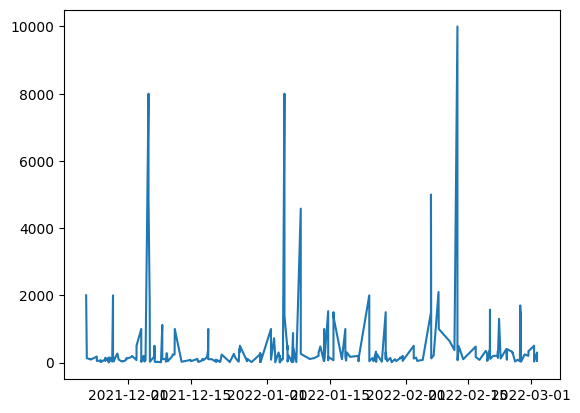

In [ ]:
plt.plot(df['Date'],df['INR'])#inside brackate the values are x-axis and y-axis

In [ ]:
#day name wise bar chart /month wise bar chart
df['day_name']=df['Date'].dt.day_name()

<Axes: xlabel='day_name'>

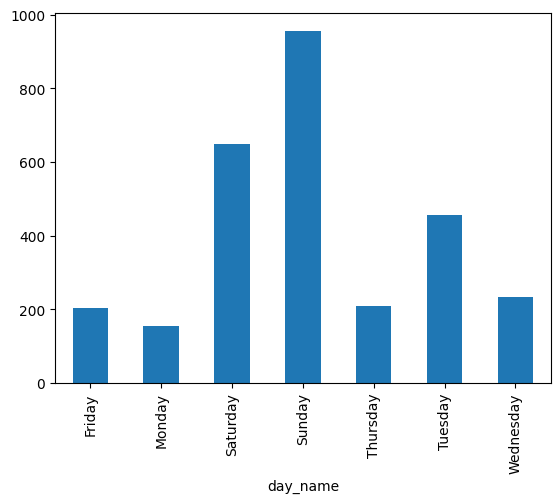

In [ ]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')#on the basis of day_name we are taking out INR by applying sum

In [ ]:
df['month_name']=df['Date'].dt.month_name()

<Axes: xlabel='month_name'>

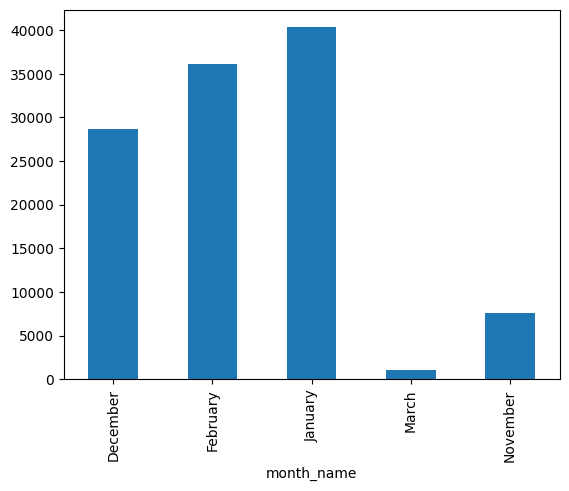

In [ ]:
df.groupby('month_name')['INR'].sum().plot(kind='bar')

In [ ]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November


# **Data visualization**

In [ ]:
types of data
numerical data
categorical data



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 2D line plot

In [ ]:
bivariate analysis
use case-time series data


In [ ]:
#plotting a simple function
price=[48000,44000,53000,47000,49000,55000]
year=[2015,2016,2017,2018,2019,2020]

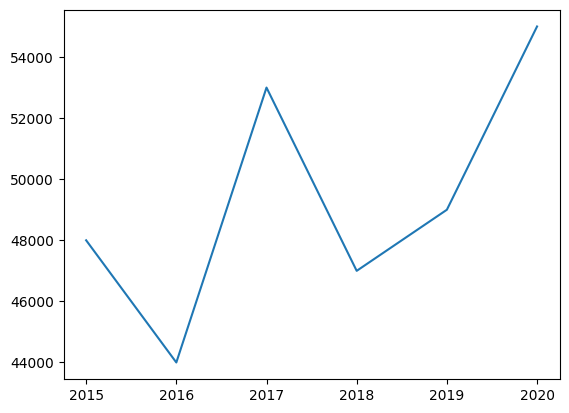

In [ ]:
plt.plot(year,price)

In [ ]:
batsman=pd.read_csv('/content/sharma-kohli.csv')
batsman

,index,RG Sharma,V Kohli
0,2008,404,165
1,2009,362,246
2,2010,404,307
3,2011,372,557
4,2012,433,364
5,2013,538,639
6,2014,390,359
7,2015,482,505
8,2016,489,973
9,2017,333,308


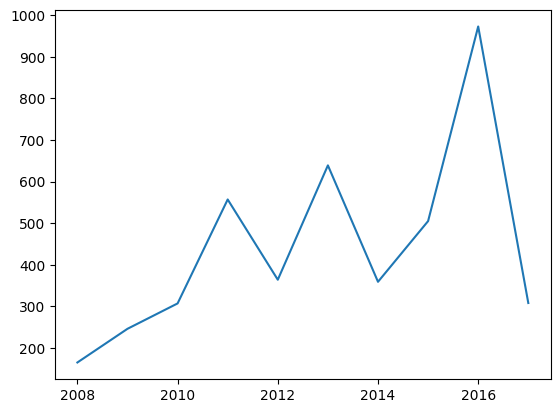

In [ ]:
plt.plot(batsman['index'],batsman['V Kohli'])

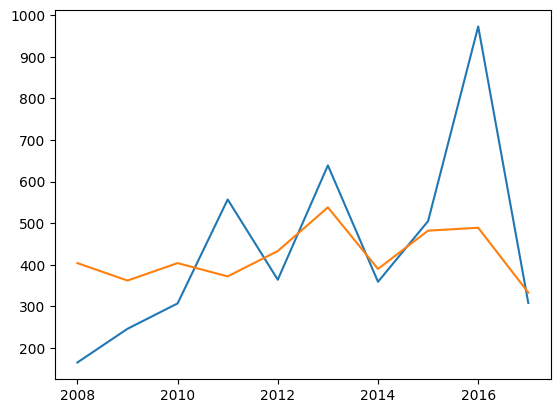

In [ ]:
plt.plot(batsman['index'],batsman['V Kohli'])
plt.plot(batsman['index'],batsman['RG Sharma'])

Text(0, 0.5, 'Runs scored')

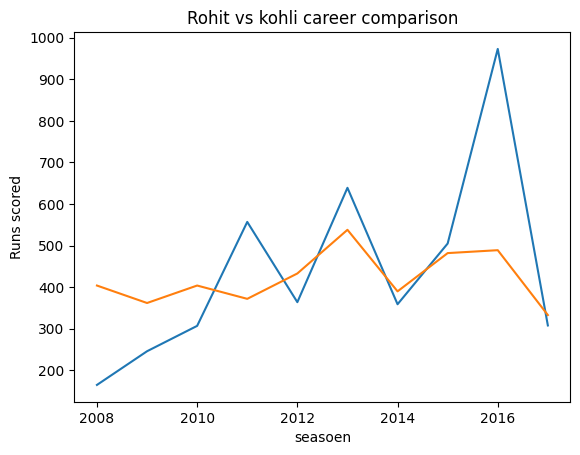

In [ ]:
#giving labesl
plt.plot(batsman['index'],batsman['V Kohli'])
plt.plot(batsman['index'],batsman['RG Sharma'])
plt.title('Rohit vs kohli career comparison')
plt.xlabel('seasoen')
plt.ylabel('Runs scored')


Text(0, 0.5, 'Runs scored')

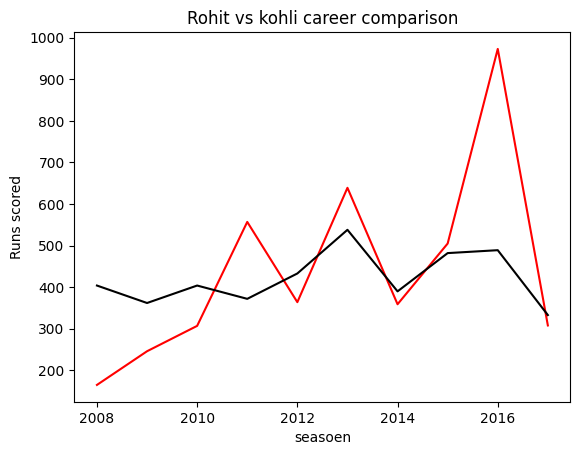

In [ ]:
#giving diff colors in plot
plt.plot(batsman['index'],batsman['V Kohli'],color='red')
plt.plot(batsman['index'],batsman['RG Sharma'],color='black')
plt.title('Rohit vs kohli career comparison')
plt.xlabel('seasoen')
plt.ylabel('Runs scored')


Text(0, 0.5, 'Runs scored')

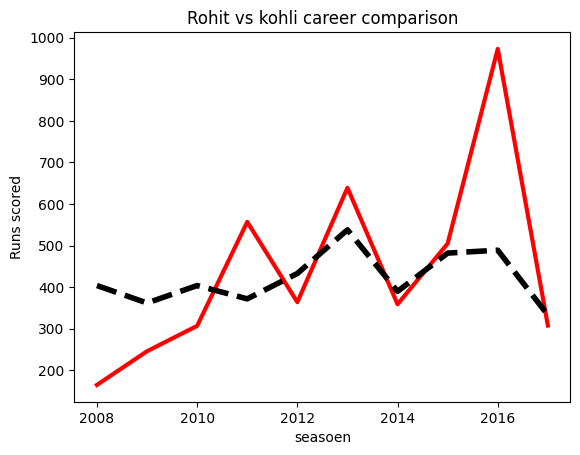

In [ ]:
#changing style of lines
plt.plot(batsman['index'],batsman['V Kohli'],color='red',linewidth=3)#dashdot,dotted
plt.plot(batsman['index'],batsman['RG Sharma'],color='black',linestyle='dashed',linewidth=4
         )
plt.title('Rohit vs kohli career comparison')
plt.xlabel('seasoen')
plt.ylabel('Runs scored')


Text(0, 0.5, 'Runs scored')

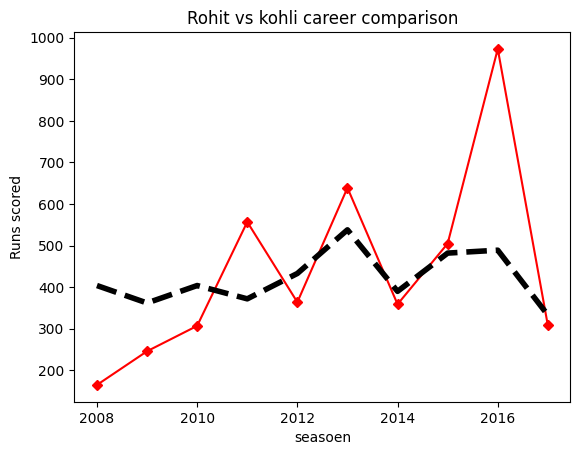

In [ ]:
#changing style of lines
plt.plot(batsman['index'],batsman['V Kohli'],color='red',marker='D',markersize=5)#D,+,.,>,<,o
plt.plot(batsman['index'],batsman['RG Sharma'],color='black',linestyle='dashed',linewidth=4
         )
plt.title('Rohit vs kohli career comparison')
plt.xlabel('seasoen')
plt.ylabel('Runs scored')


In [ ]:
"""upper left: loc='upper left'
upper right: loc='upper right'
lower left: loc='lower left'
lower right: loc='lower right'
center left: loc='center left'
center right: loc='center right'
lower center: loc='lower center'
upper center: loc='upper center'
center: loc='center' """


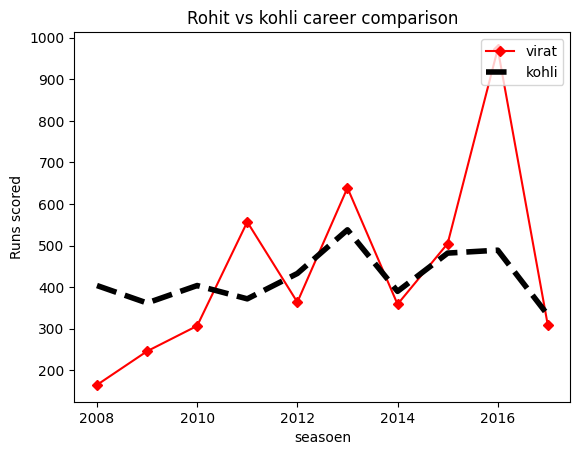

In [ ]:
#legend-location=legend function is used to print the labels
#changing style of lines
plt.plot(batsman['index'],batsman['V Kohli'],color='red',marker='D',markersize=5,label='virat')
plt.plot(batsman['index'],batsman['RG Sharma'],color='black',linestyle='dashed',linewidth=4,label='kohli')
plt.title('Rohit vs kohli career comparison')
plt.xlabel('seasoen')
plt.ylabel('Runs scored')
plt.legend(loc='upper right')#sets the location


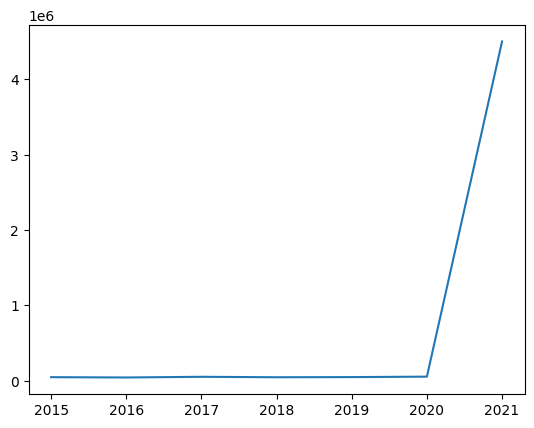

In [ ]:
#outlier affected the graph
price=[48000,44000,53000,47000,49000,55000,4500000]#as there is an outlier
year=[2015,2016,2017,2018,2019,2020,2021]

plt.plot(year,price)

(2017.0, 2020.0)

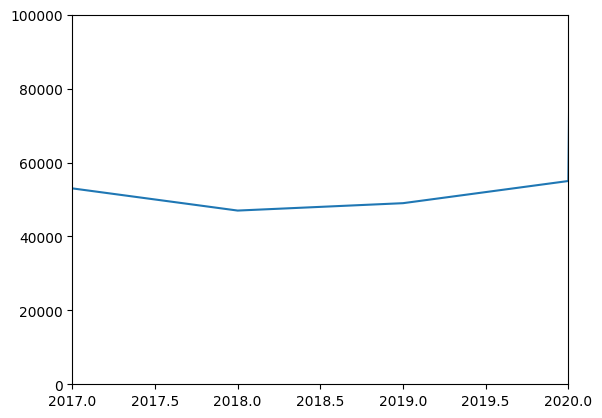

In [ ]:
#solution we can trim the graph for our desired datapoints and avoid outlier
price=[48000,44000,53000,47000,49000,55000,4500000]#as there is an outlier
year=[2015,2016,2017,2018,2019,2020,2021]

plt.plot(year,price)
plt.ylim(0,100000)#defined the range of graph and trimmed for y axis
plt.xlim(2017,2020)#trim of x axis

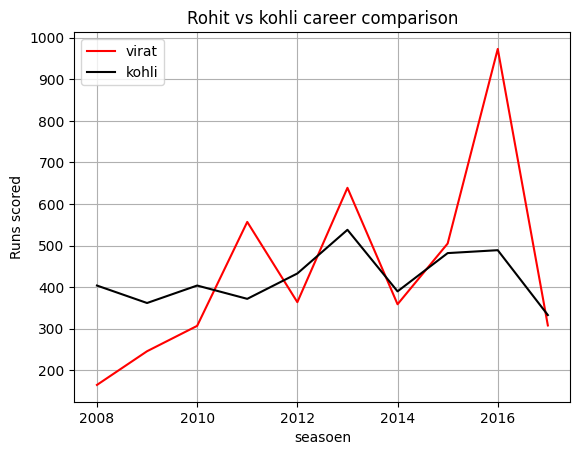

In [ ]:
#grid

plt.plot(batsman['index'],batsman['V Kohli'],color='red',label='virat')
plt.plot(batsman['index'],batsman['RG Sharma'],color='black',label='kohli')
plt.title('Rohit vs kohli career comparison')
plt.xlabel('seasoen')
plt.ylabel('Runs scored')
plt.legend()
plt.grid()#forms the grid


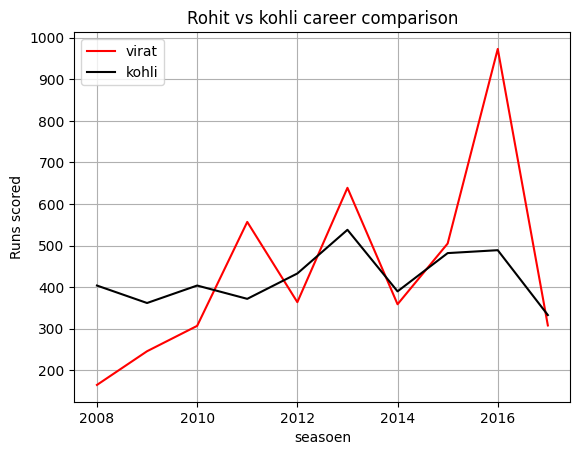

In [ ]:
#show

#google colab is a conole therefore the graph is shon with out using show function but in text editors(pycharm of spyder or vs code )will not
plt.plot(batsman['index'],batsman['V Kohli'],color='red',label='virat')
plt.plot(batsman['index'],batsman['RG Sharma'],color='black',label='kohli')
plt.title('Rohit vs kohli career comparison')
plt.xlabel('seasoen')
plt.ylabel('Runs scored')
plt.legend()
plt.grid()
plt.show()#prints the graph


### scatter plot

In [ ]:
for bivatiate analysis
numerical vs numerical columns
use case=find correlation betwn 2 quantities


In [ ]:
#simple example
x=np.linspace(-10.10,50)
y=10*x +3 + np.random.randint(0,300,50)

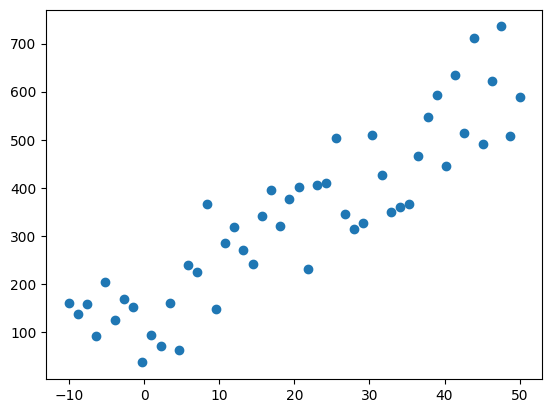

In [ ]:
plt.scatter(x,y)#can show that there is linear sot of correlation

In [ ]:
batter=pd.read_csv('/content/batter.csv')

In [ ]:
batter=batter.head(50)

Text(0, 0.5, 'strike rate of batsman')

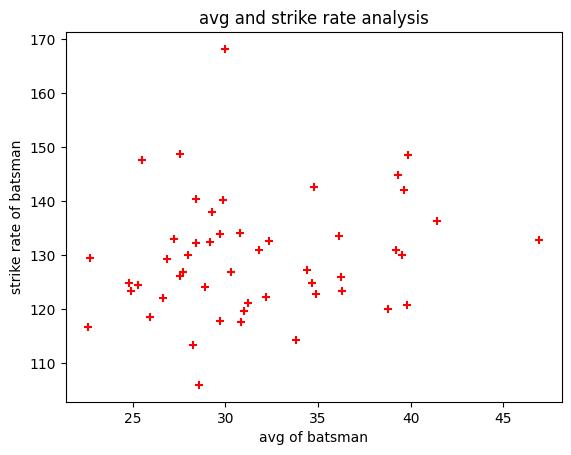

In [ ]:
plt.scatter(batter['avg'],batter['strike_rate'],color='red',marker="+")
plt.title('avg and strike rate analysis')
plt.xlabel('avg of batsman')
plt.ylabel('strike rate of batsman')

In [ ]:
#size parameter
tips=sns.load_dataset('tips')

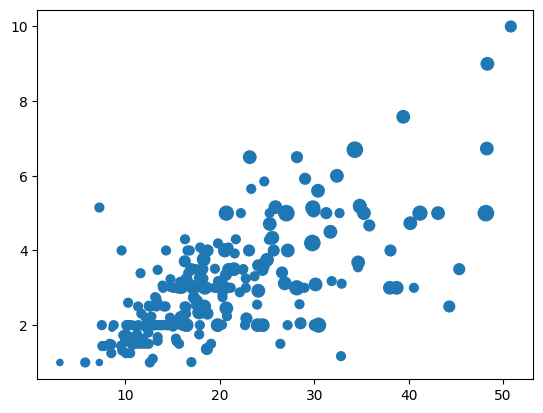

In [ ]:
plt.scatter(tips['total_bill'],tips['tip'],s=tips['size']*20)#id dataframe size is the num of people along with the person came ,size is 20 times the people the customer came with

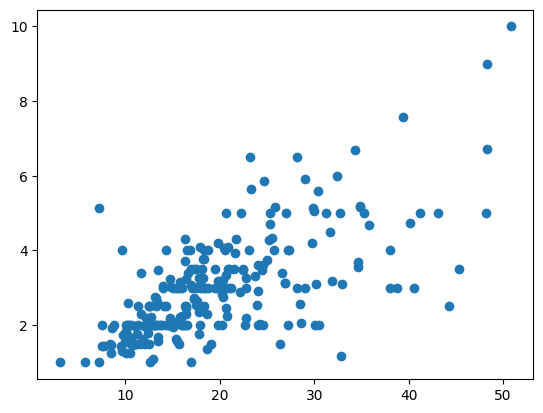

In [ ]:
#scatterplot using plt.plot function
plt.plot(tips['total_bill'],tips['tip'],'o')#gives a 2D plot therefore use shape o

### Bar chart

In [ ]:
bivariate and univariate analysis
numerical vs category
use case=aggrgate analysis of grps

In [ ]:
children=[10,20,30,40,10]
colors=['red','green','blue','pink','yellow']

Text(0, 0.5, 'children')

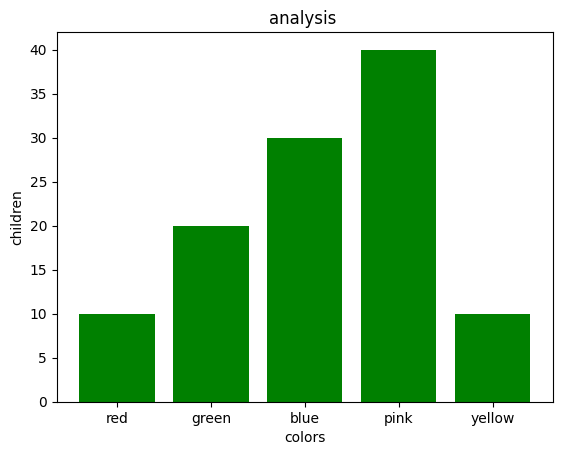

In [ ]:
plt.bar(colors,children,color='green')
plt.title('analysis ')
plt.xlabel('colors')

plt.ylabel('children')

Text(0, 0.5, 'children')

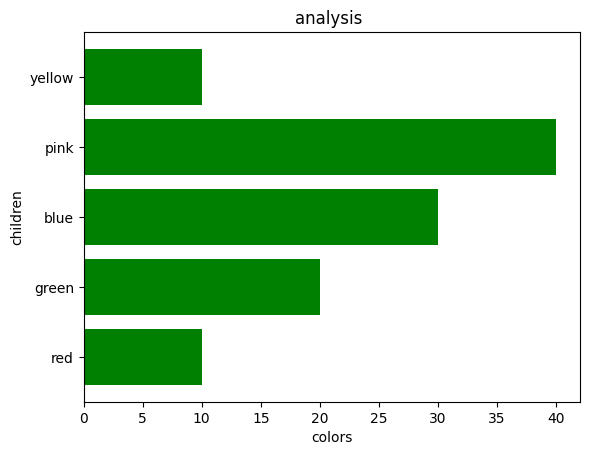

In [ ]:
plt.barh(colors,children,color='green')#for horizontal bar chart
plt.title('analysis ')
plt.xlabel('colors')
plt.ylabel('children')

In [ ]:
#mutliple bar chart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/batsman_season_record.csv')

<BarContainer object of 5 artists>

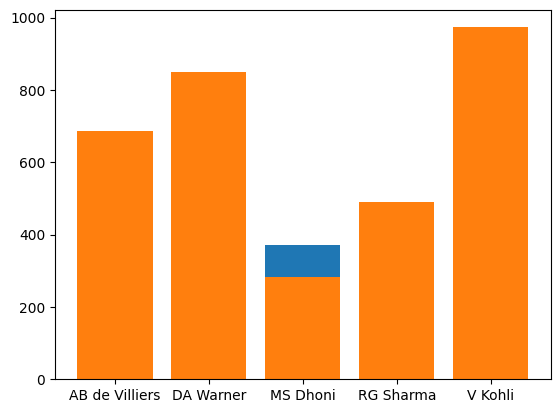

In [ ]:
#plot a graph to show runs of all playes in year 2017
plt.bar(df['batsman'],df['2015'])
plt.bar(df['batsman'],df['2016'])#this graphs got overlapped

In [ ]:
df

,batsman,2015,2016,2017
0,AB de Villiers,513,687,216
1,DA Warner,562,848,641
2,MS Dhoni,372,284,290
3,RG Sharma,482,489,333
4,V Kohli,505,973,308


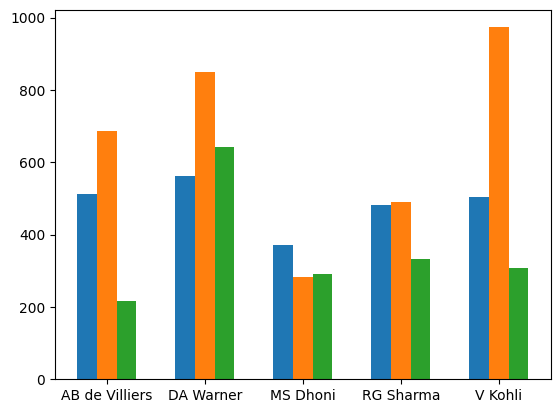

In [ ]:
plt.bar(np.arange(df.shape[0])-0.2,df['2015'],width=0.2,)#shifted the x-axis
plt.bar(np.arange(df.shape[0]),df['2016'],width=0.2)
plt.bar(np.arange(df.shape[0])+0.2,df['2017'],width=0.2)

#now albels for the x-axis
plt.xticks(np.arange(df.shape[0]),df['batsman'])#np.xticks(the graph label now,label with thich you want to replace)


plt.show()

In [ ]:
#problem
children=[10,20,30,40,10]#the anmes are so lonfg that they are overlaping
colors=['red red red red red red ','green green green green','blue blue blue blue blue','pink oink pink pink pink','yellow yellow yellow yellow']

Text(0, 0.5, 'children')

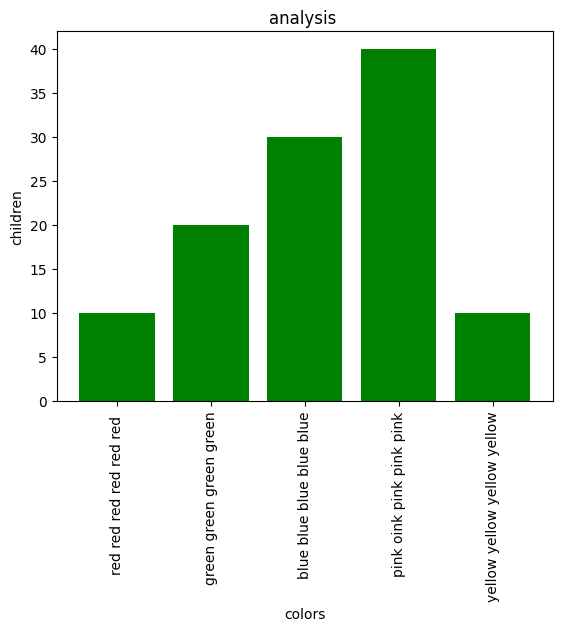

In [ ]:
plt.bar(colors,children,color='green')
plt.xticks(rotation='vertical')
plt.title('analysis ')
plt.xlabel('colors')

plt.ylabel('children')

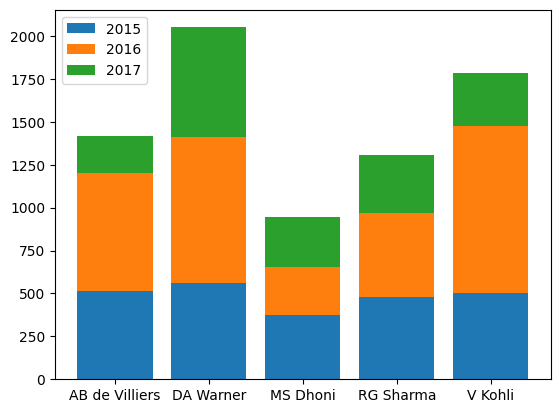

In [ ]:
#stacked bar chart
plt.bar(df['batsman'],df['2015'],label='2015')
plt.bar(df['batsman'],df['2016'],bottom=df['2015'],label='2016')
plt.bar(df['batsman'],df['2017'],bottom=(df['2015']+df['2016']),label='2017')

plt.legend()
plt.show()

### histogram

In [ ]:
univariate
numerical col
use case-frequency analysis

(array([1., 2., 1., 2.]),
 array([10., 25., 40., 55., 70.]),
 <BarContainer object of 4 artists>)

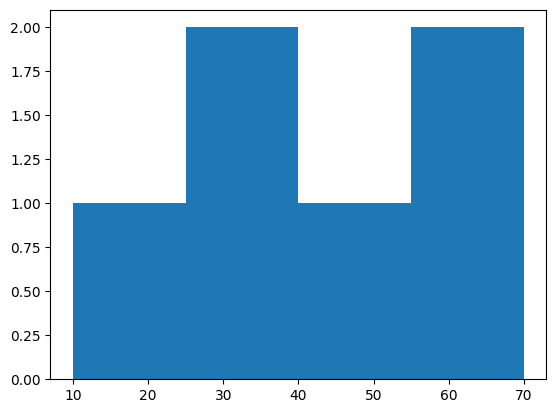

In [ ]:
data=[31,45,56,15,27,61]
plt.hist(data,bins=[10,25,40,55,70])#select the num from data which is addaed into bins in given range

In [ ]:
#example
df=pd.read_csv('/content/vk.csv')
df

,match_id,batsman_runs
0,12,62
1,17,28
2,20,64
3,27,0
4,30,10
...,...,...
136,624,75
137,626,113
138,632,54
139,633,0


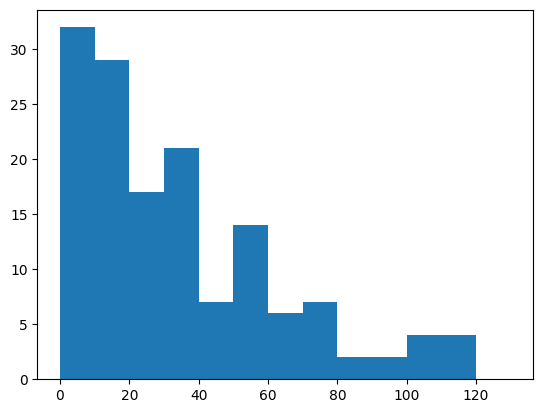

In [ ]:
plt.hist(df['batsman_runs'],bins=[0,10,20,30,40,50,60,70,80,90,100,120,130])
plt.show()#removes the technical info which is shown  along with graph

In [ ]:
#logarithmic scale
arr=np.load('/content/big-array.npy')
arr.shape

(11949,)

(array([   23.,   200., 10000.,   400.,  1234.,    92.]),
 array([10., 20., 30., 40., 50., 60., 70.]),
 <BarContainer object of 6 artists>)

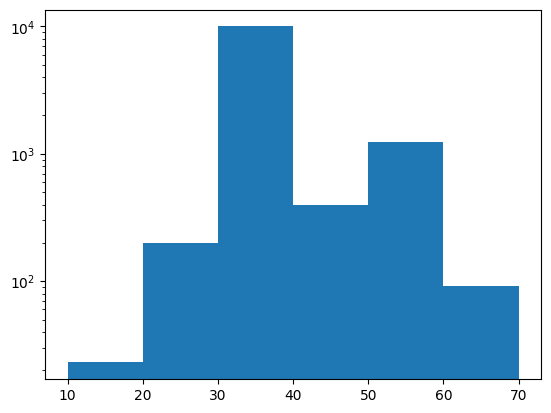

In [ ]:
plt.hist(arr,bins=[10,20,30,40,50,60,70],log=True)#there is huge diiference in data
#therefore instead of linear scale use logarithmic scale=1 to 100 and 100 to 200 equal

## **pie chart**

In [ ]:
univariate and bivariate
categorical vs numerical
use case=to find contribution on A standard sclae


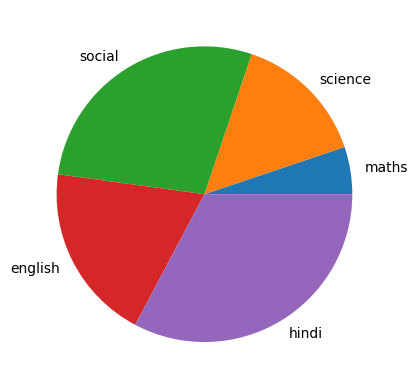

In [ ]:
data=[12,34,65,45,76]
marks=['maths','science','social','english','hindi']
plt.pie(data,labels=marks)
plt.show()

In [ ]:
df=pd.read_csv('/content/gayle-175.csv')

In [ ]:
df

,batsman,batsman_runs
0,AB de Villiers,31
1,CH Gayle,175
2,R Rampaul,0
3,SS Tiwary,2
4,TM Dilshan,33
5,V Kohli,11


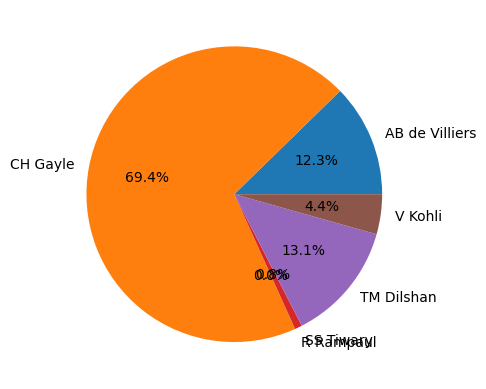

In [ ]:
plt.pie(df['batsman_runs'],labels=df['batsman'],autopct='%0.1f%%')#auto percentage
plt.show()

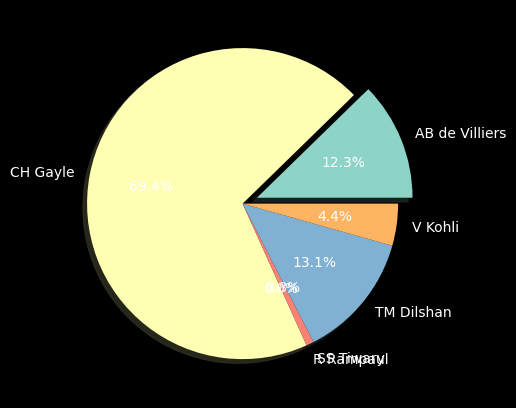

In [ ]:
plt.pie(df['batsman_runs'],labels=df['batsman'],autopct='%0.1f%%',explode=[0.1,0,0,0,0,0],shadow=True)#explode helps to highlight a single pie part
plt.show()

# changing styles

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use( 'default')

(array([   23.,   200., 10000.,   400.,  1234.,    92.]),
 array([10., 20., 30., 40., 50., 60., 70.]),
 <BarContainer object of 6 artists>)

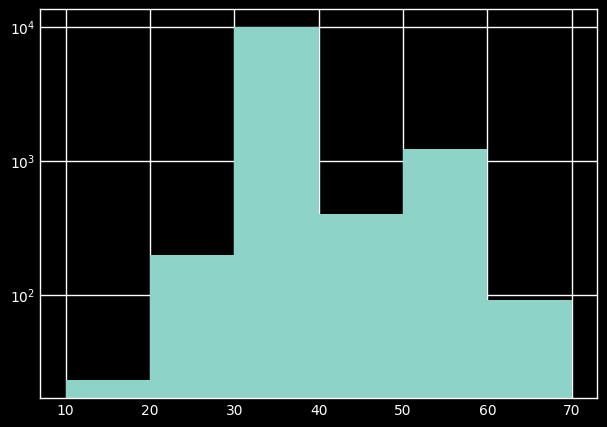

In [ ]:
arr=np.load('/content/big-array.npy')
plt.hist(arr,bins=[10,20,30,40,50,60,70],log=True)


In [ ]:
#to save the graph
#if you want to save any graph dont use plt.show()
plt.savefig('histogram.png')

<Figure size 640x480 with 0 Axes>

### **Advanced matplotlib**

In [ ]:
iris=pd.read_csv("/content/iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris['Species']=iris['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2})

<ipython-input-78-120afc97f020>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['Species']=iris['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2})


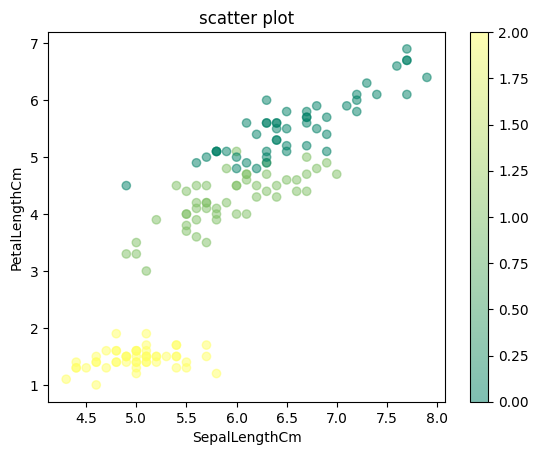

In [ ]:
plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='summer',alpha=0.5)#c is hidden parameter ,cmap uses different themes for diff colors
plt.title('scatter plot')
plt.xlabel('SepalLengthCm')#aplha is used to maintain the opacity of the graph
plt.ylabel('PetalLengthCm')
plt.colorbar()#shows the line of range showing the labeling

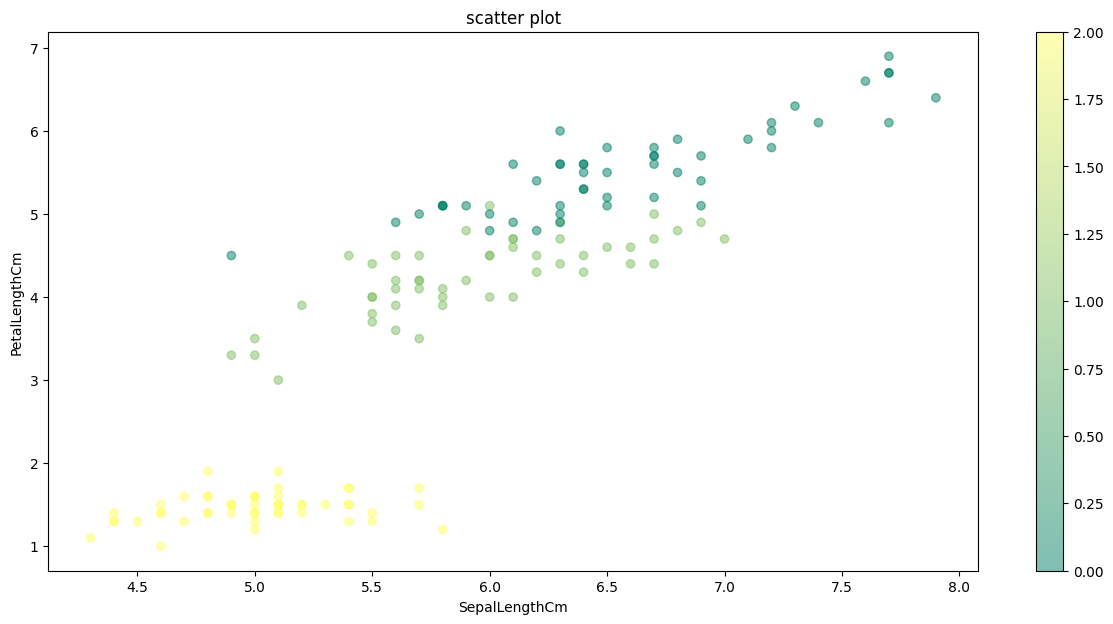

In [ ]:
plt.figure(figsize=(15,7))#figsize(width,height)

plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='summer',alpha=0.5)
plt.title('scatter plot')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.colorbar()

## Annotations

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/batter.csv")

In [ ]:
sample=df.sample(100).sample(25,random_state=5)#select 25 from 100 generated sample

In [ ]:
sample

,batter,runs,avg,strike_rate
440,JR Hazlewood,18,NaN,66.666667
496,Jaskaran Singh,8,8.000000,72.727273
368,Anureet Singh,36,9.000000,76.595745
486,D du Preez,10,10.000000,76.923077
383,T Taibu,31,10.333333,119.230769
111,PP Chawla,584,11.680000,107.550645
400,TL Seifert,26,8.666667,100.000000
177,R Powell,250,25.000000,143.678161
95,MS Bisla,798,21.000000,108.276798
153,KV Sharma,317,15.095238,111.228070


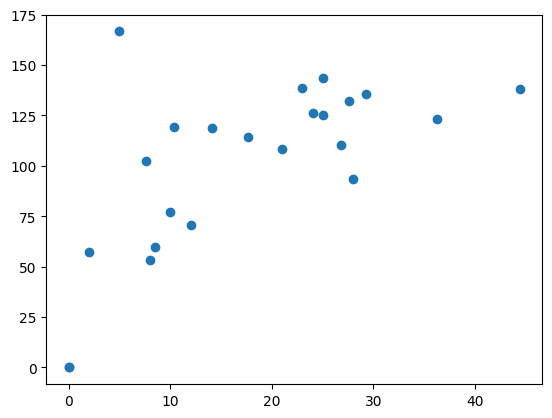

In [ ]:
plt.scatter(sample['avg'],sample['strike_rate'])#we dont know which dot is which player=solution =annotation

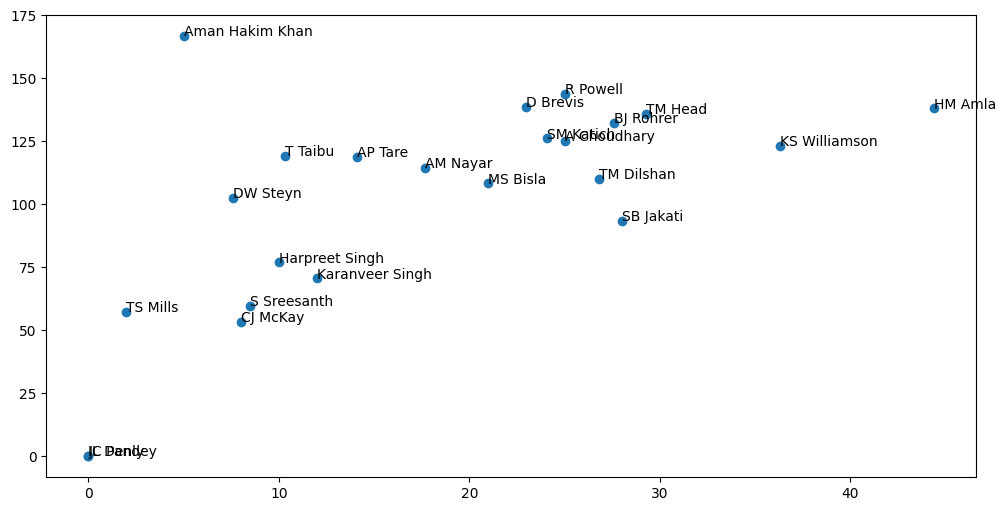

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(sample['avg'],sample['strike_rate'])
for i in range(sample.shape[0]):
  plt.text(sample['avg'].values[i],sample['strike_rate'].values[i],sample['batter'].values[i])

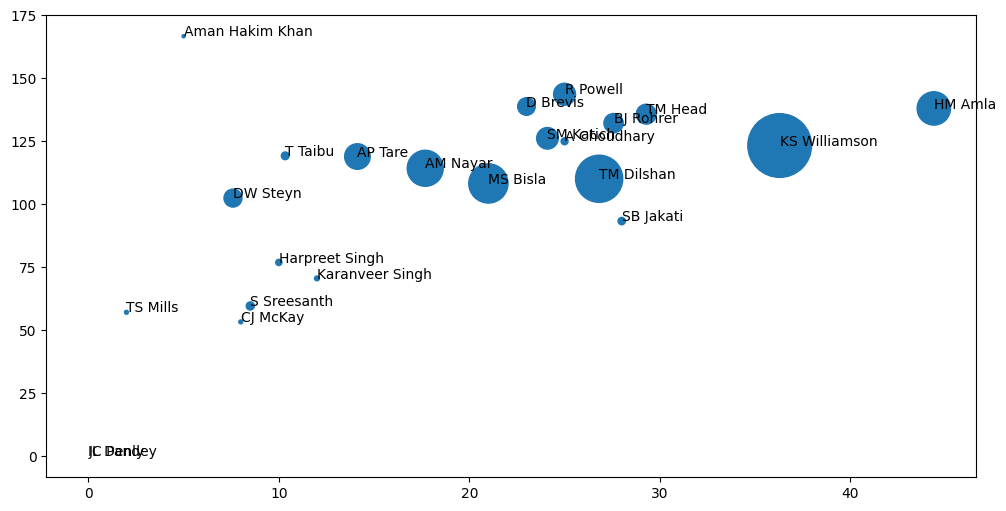

In [ ]:
#now i want to size the dot on the basis of runs made by the player
plt.figure(figsize=(12,6))

plt.scatter(sample['avg'],sample['strike_rate'],s=sample['runs'])

for i in range(sample.shape[0]):
  plt.text(sample['avg'].values[i],sample['strike_rate'].values[i],sample['batter'].values[i])

### horizontal and verticals line plot

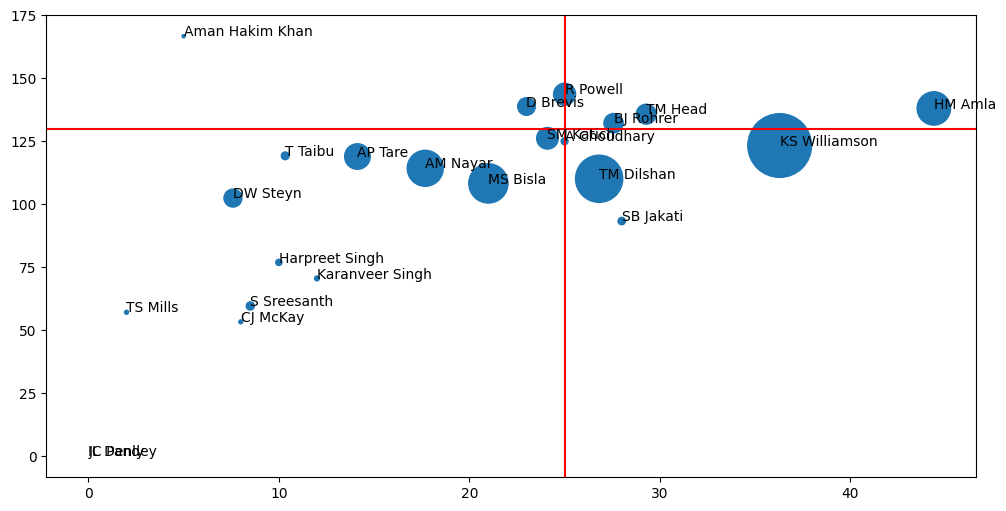

In [ ]:
plt.figure(figsize=(12,6))

plt.scatter(sample['avg'],sample['strike_rate'],s=sample['runs'])

plt.axhline(130,color='red')#axis horizontal line(points on desired column)130 strike rate
plt.axvline(25,color='red')#25 avg
for i in range(sample.shape[0]):
  plt.text(sample['avg'].values[i],sample['strike_rate'].values[i],sample['batter'].values[i])

### subplots

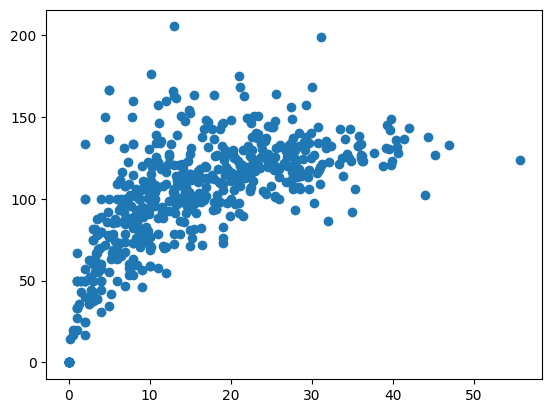

In [ ]:
plt.scatter(df['avg'],df['strike_rate'])

In [ ]:
import matplotlib.pyplot as plt

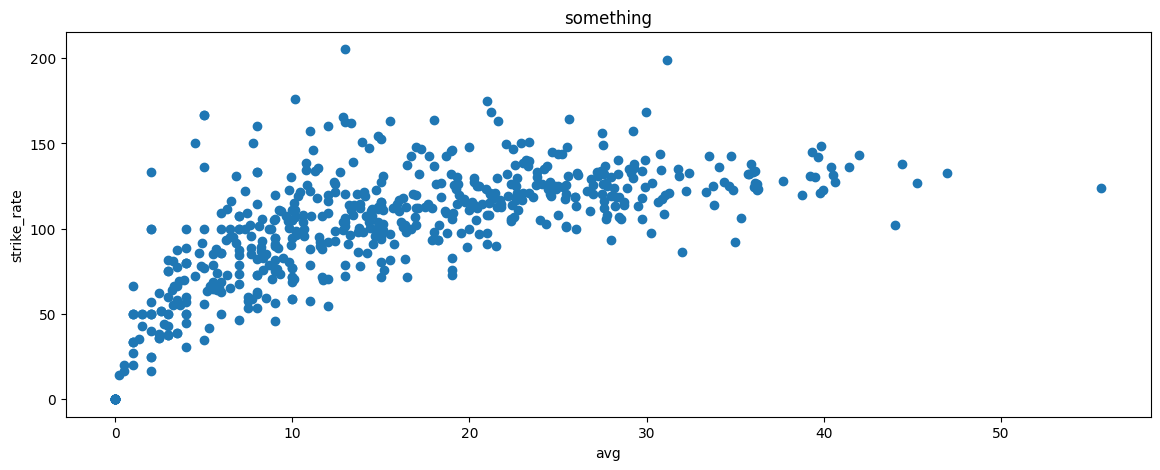

In [ ]:
#anoter method
fig,ax=plt.subplots(figsize=(14,5))#has 2 objects fig and ax
ax.scatter(df['avg'],df['strike_rate'])

ax.set_title('something')#to keep the label
ax.set_xlabel('avg')
ax.set_ylabel('strike_rate')
fig.show()

(array([499.,  40.,  19.,  19.,   9.,   6.,   4.,   4.,   3.,   2.]),
 array([   0. ,  663.4, 1326.8, 1990.2, 2653.6, 3317. , 3980.4, 4643.8,
        5307.2, 5970.6, 6634. ]),
 <BarContainer object of 10 artists>)

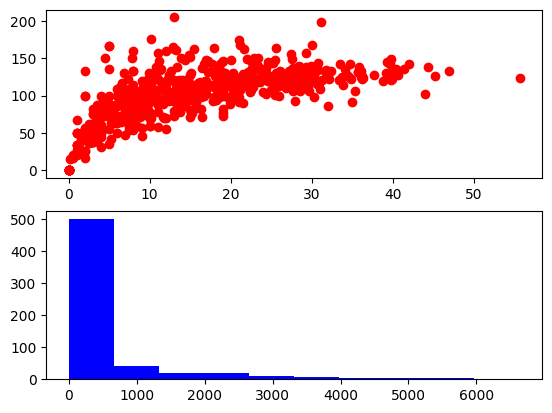

In [ ]:
fig=plt.figure()

ax1=fig.add_subplot(211)#position=2 rows 1 col and 1st graph
ax1.scatter(df['avg'],df['strike_rate'],color='red')

ax2=fig.add_subplot(212)#2 rows 1 col and 2nd graph
ax2.hist(df['runs'],color='blue')


(array([102., 125., 103.,  82.,  78.,  43.,  22.,  14.,   2.,   1.]),
 array([ 0.        ,  5.56666667, 11.13333333, 16.7       , 22.26666667,
        27.83333333, 33.4       , 38.96666667, 44.53333333, 50.1       ,
        55.66666667]),
 <BarContainer object of 10 artists>)

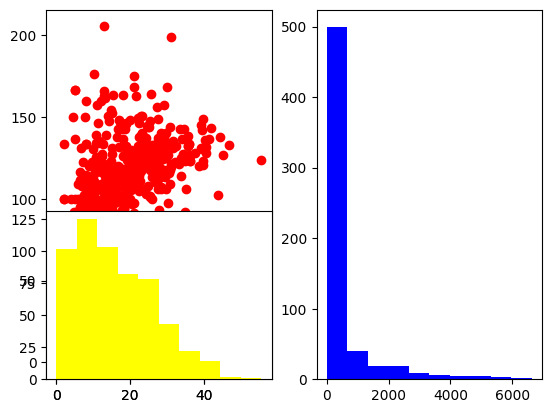

In [ ]:
fig=plt.figure()

ax1=fig.add_subplot(121)
ax1.scatter(df['avg'],df['strike_rate'],color='red')

ax2=fig.add_subplot(122)
ax2.hist(df['runs'],color='blue')

ax3=fig.add_subplot(223)
ax3.hist(df['avg'],color='yellow')



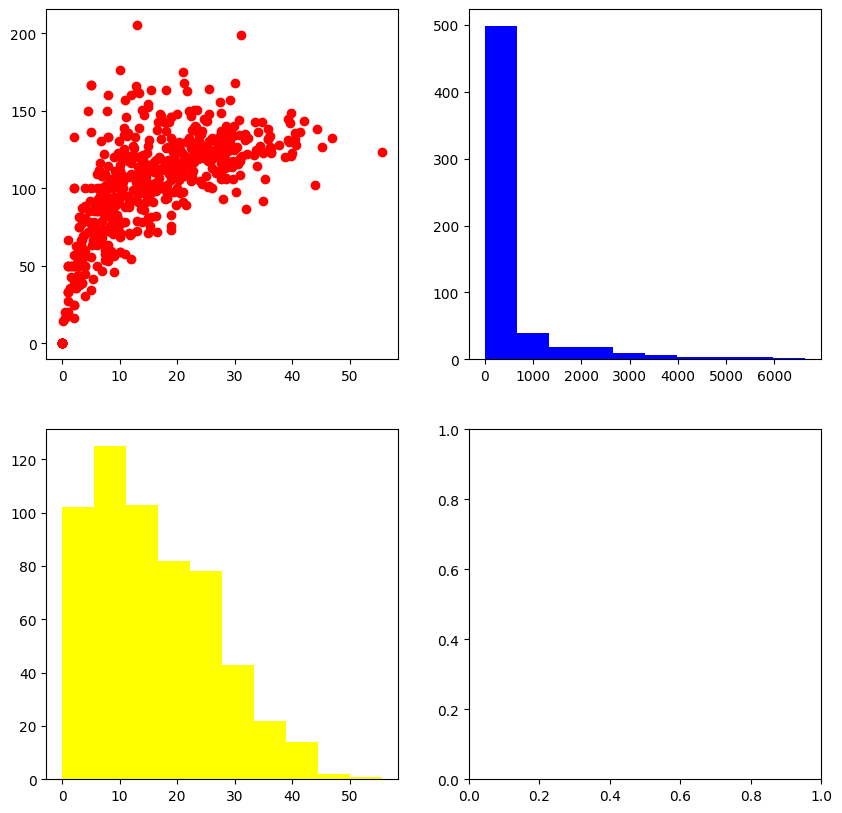

In [ ]:
#avg,strkie and avg,runs
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))#2*1 =2 graphs are formed
ax[0,0].scatter(df['avg'],df['strike_rate'],color='red')
ax[0,1].hist(df['runs'],color='blue')
ax[1,0].hist(df['avg'],color='yellow')
plt.show()

### 3D plots

Text(0.5, 0, 'strike_rate')

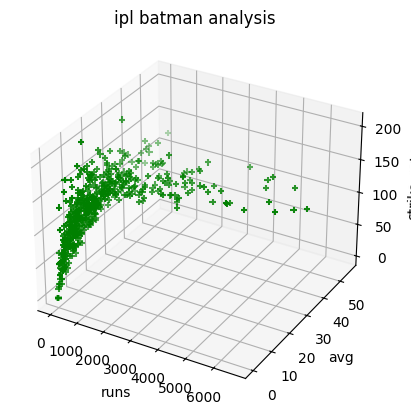

In [ ]:
df

fig=plt.figure()
ax=plt.subplot(projection='3d')

ax.scatter3D(df['runs'],df['avg'],df['strike_rate'],color='green',marker="+")
ax.set_title('ipl batman analysis')
ax.set_ylabel('avg')
ax.set_xlabel('runs')
ax.set_zlabel('strike_rate')

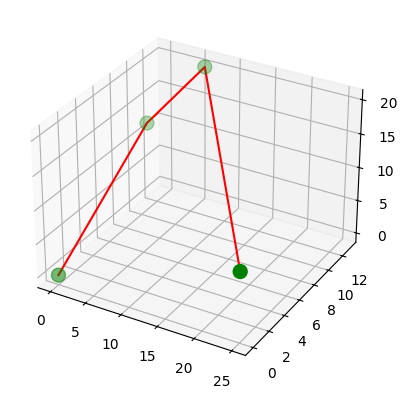

In [ ]:
#line plot

x=[0,1,6,25]
y=[0,10,13,0]
z=[0,13,20,9]
fig =plt.figure()
ax=plt.subplot(projection='3d')

ax.scatter3D(x,y,z,color='green',marker="o",s=[100,100,100,100])

ax.plot3D(x,y,z,color='red')

### surface plot

In [ ]:
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)


In [ ]:
xx,yy=np.meshgrid(x,y)#meshdrid is used to create 2d array

In [ ]:
yy.shape

(100, 100)

In [ ]:
z=xx**2 + yy**2#this is the line formula as xsq + ysq

In [ ]:
z.shape

(100, 100)

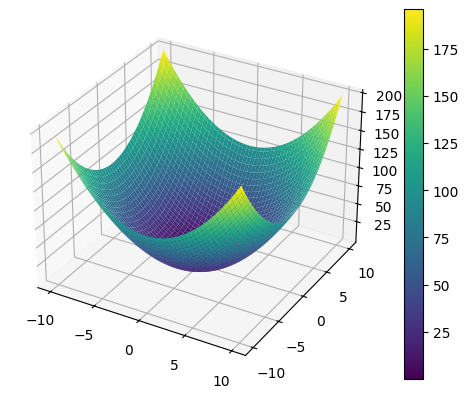

In [ ]:
fig=plt.figure()
ax=plt.subplot(projection='3d')
p=ax.plot_surface(xx,yy,z,cmap='viridis')
fig.colorbar(p)

In [ ]:
z=np.sin(xx)+np.cos(yy)

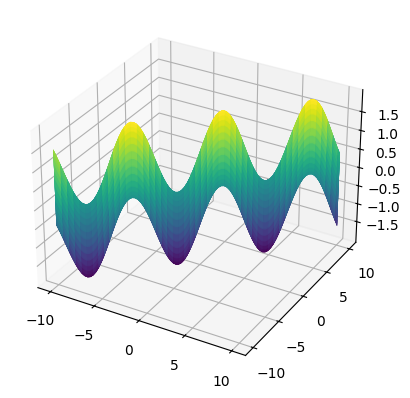

In [ ]:
fig=plt.figure()
ax=plt.subplot(projection='3d')
ax.plot_surface(x,y,z,cmap='viridis')

### Contour plot-2d graph to 3d graph

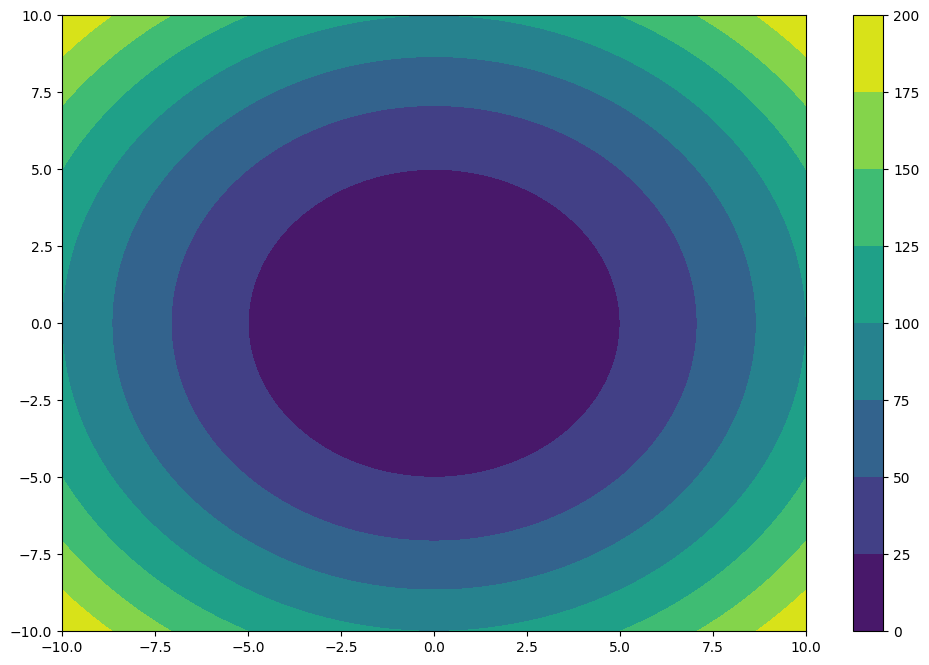

In [ ]:
z=xx**2 + yy**2#this is the line formula as xsq + ysq
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()
p=ax.contourf(xx,yy,z,cmap='viridis')
fig.colorbar(p)

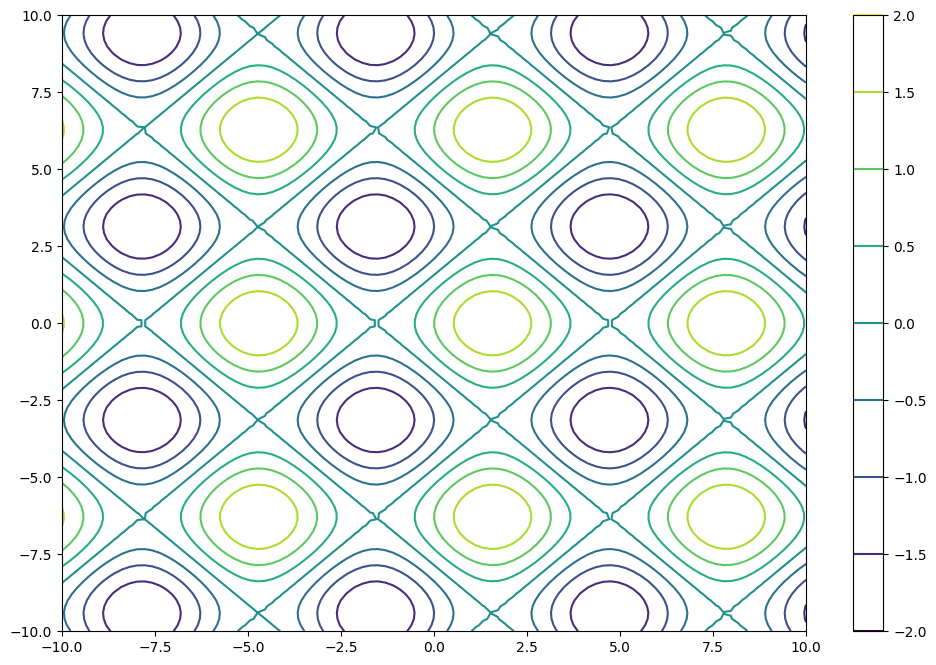

In [ ]:
z=np.sin(xx)+np.cos(yy)
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()
p=ax.contour(xx,yy,z,cmap='viridis')#contourf is used to get the contour plot filled with olr
fig.colorbar(p)

### heatmap

In [2]:
df=pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')

In [3]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [18]:
#here the ball number unique values should be 6 but there are 10 therefore
temp_df=df[(df['ballnumber'].isin([1,2,3,4,5,6])) & (df['batsman_run']==6)]
temp_df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
16,1312200,1,2,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
22,1312200,1,3,5,YBK Jaiswal,Yash Dayal,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
103,1312200,1,17,2,TA Boult,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
107,1312200,1,17,6,OC McCoy,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
142,1312200,2,3,5,MS Wade,M Prasidh Krishna,Shubman Gill,NaN,6,0,6,0,0,NaN,NaN,NaN,Gujarat Titans


In [20]:
grid=temp_df.pivot_table(index='overs',columns='ballnumber',values='batsman_run',aggfunc='count')
grid

ballnumber,1,2,3,4,5,6
overs,,,,,,
0,9,17,31,39,33,27
1,31,40,49,56,58,54
2,75,62,70,72,58,76
3,60,74,74,103,74,71
4,71,76,112,80,81,72
5,77,102,63,86,78,80
6,34,56,49,59,64,38
7,59,62,73,70,69,56
8,86,83,79,81,73,52


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

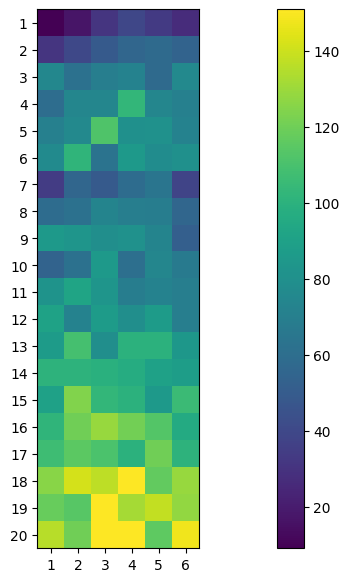

In [38]:
plt.figure(figsize=(20,7))
plt.imshow(grid)
plt.yticks(df['overs'].unique(),list(range(1,21)))
plt.xticks(np.arange(0,6),list(range(1,7)))
plt.colorbar()

### `pandas DataFrame plot()`

<Axes: >

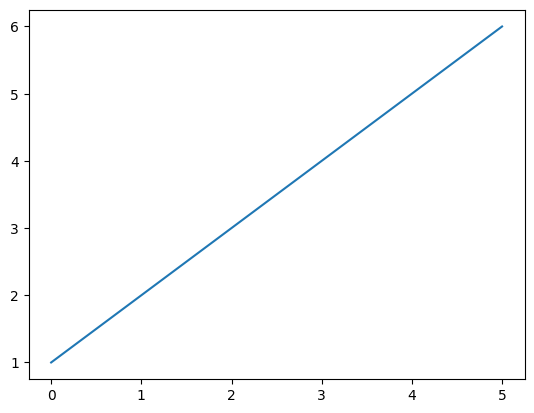

In [39]:
#on a series
s=pd.Series([1,2,3,4,5,6])
s.plot(kind='line')

In [41]:
tips=sns.load_dataset('tips')
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [51]:
tips['size']=tips['size']*70

<Axes: title={'center': 'cost analysis'}, xlabel='total_bill', ylabel='tip'>

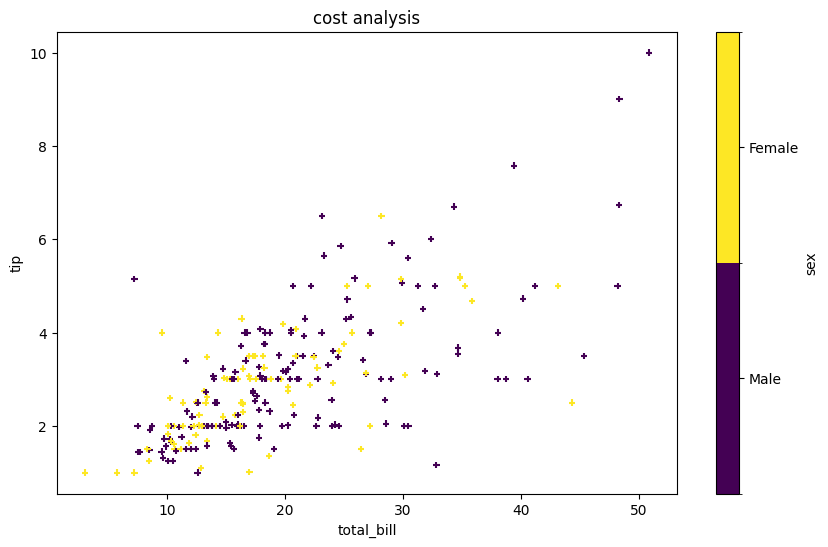

In [52]:
#scatter plot
tips.plot(kind='scatter',x='total_bill',y='tip',title='cost analysis',c='sex',marker='+',figsize=(10,6),cmap='viridis')#c is it differetiates the customers on  the basis of sex col

In [56]:
df=pd.read_csv("/content/batsman_season_record (1).csv")
df

,batsman,2015,2016,2017
0,AB de Villiers,513,687,216
1,DA Warner,562,848,641
2,MS Dhoni,372,284,290
3,RG Sharma,482,489,333
4,V Kohli,505,973,308


<Axes: title={'center': 'batsmans runs'}, xlabel='players', ylabel='runs'>

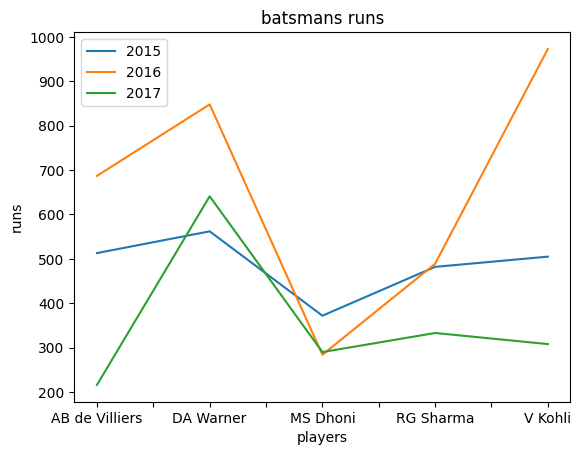

In [60]:
df.plot(kind='line',x='batsman',xlabel='players',ylabel='runs',title='batsmans runs')

<Axes: xlabel='batsman'>

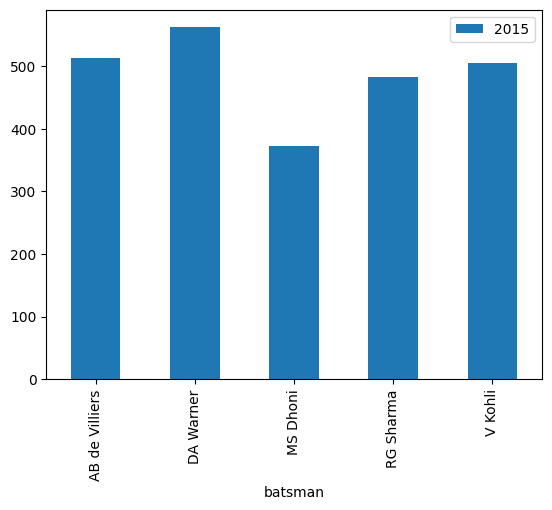

In [61]:
df.plot(kind='bar',x='batsman',y='2015')

<ipython-input-63-d61e56590ac9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['total_bill'].mean().plot(kind='bar')


<Axes: xlabel='sex'>

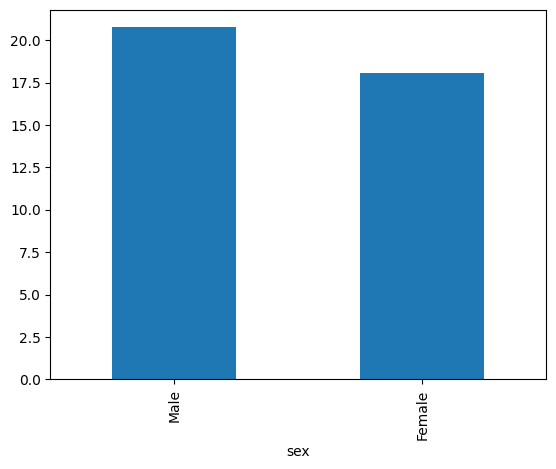

In [63]:
tips.groupby('sex')['total_bill'].mean().plot(kind='bar')

<Axes: >

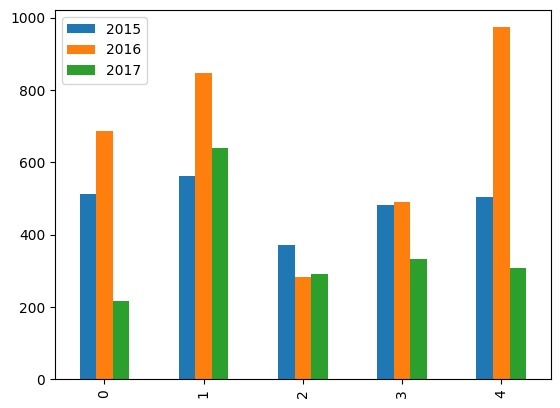

In [64]:
df.plot(kind='bar')

<Axes: >

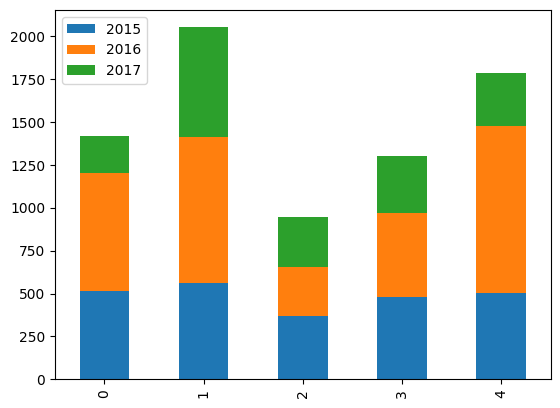

In [65]:
df.plot(kind='bar',stacked=True)#in matplotlib we did it manually but in pandas it is done itself

In [99]:
df

,batsman,2015,2016,2017
0,AB de Villiers,513,687,216
1,DA Warner,562,848,641
2,MS Dhoni,372,284,290
3,RG Sharma,482,489,333
4,V Kohli,505,973,308


array([<Axes: ylabel='2015'>, <Axes: ylabel='2016'>,
       <Axes: ylabel='2017'>], dtype=object)

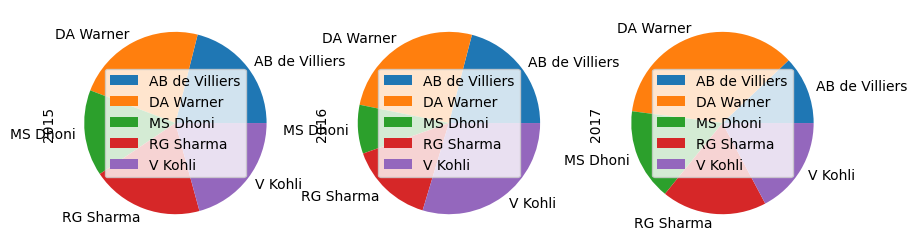

In [100]:
#multiple pie charts
df[['2015','2016','2017']].plot(kind='pie',subplots=True,figsize=(10,10),labels=df['batsman'])


In [90]:
df.values
def namee(i):
  for i in df.values:
    l=(i[0])
    print(l)

In [93]:
names=namee(df.values)

AB de Villiers
DA Warner
MS Dhoni
RG Sharma
V Kohli


array([<Axes: xlabel='[AB de Villiers, DA Warner, MS Dhoni, RG Sharma, V Kohli]'>,
       <Axes: xlabel='[AB de Villiers, DA Warner, MS Dhoni, RG Sharma, V Kohli]'>,
       <Axes: xlabel='[AB de Villiers, DA Warner, MS Dhoni, RG Sharma, V Kohli]'>],
      dtype=object)

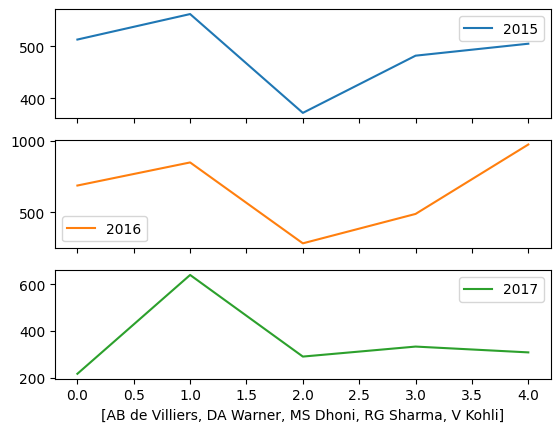

In [105]:
#multiple seperate graphs together
df.plot(kind='line',subplots=True,xlabel=df['batsman'])

<ipython-input-114-85e172d67ff6>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table=tips.pivot_table(index=['day','time'],columns=['sex','smoker'],values='total_bill',aggfunc='mean')


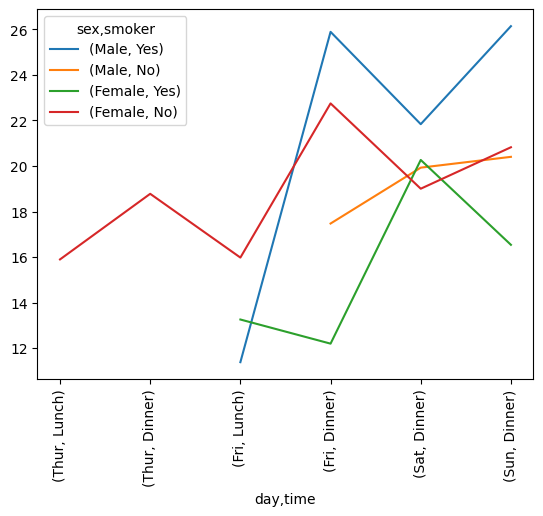

In [114]:
#on multi index dataframe
pivot_table=tips.pivot_table(index=['day','time'],columns=['sex','smoker'],values='total_bill',aggfunc='mean')
ax=pivot_table.plot(kind='line')
plt.xticks(rotation=90)
plt.show()
